In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [5]:
#导入数据
oil=pd.read_csv("oil.csv")
holidays=pd.read_csv("holidays_events.csv")
transactions=pd.read_csv("transactions.csv")
data=pd.read_csv("train.csv")
stores=pd.read_csv("stores.csv")
test=pd.read_csv("test.csv")

In [6]:
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
datas=data.copy()
print(datas.shape)
print("***************************************")
print(datas.dtypes)
print("***************************************")
print(datas.isnull().sum())
print("***************************************")
print(datas["family"].unique())
print("***************************************")
muestra=datas.sample(frac=0.025)
print("***************************************")
print(muestra.shape)

(3000888, 6)
***************************************
id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
***************************************
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
***************************************
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
***************************************
***************************************
(75022, 6)


In [8]:
muestra["date"]=pd.to_datetime(muestra["date"])
muestra['year'] = muestra['date'].dt.year
muestra['month'] = muestra['date'].dt.month
muestra['day'] = muestra['date'].dt.day
muestra['dayofweek'] = muestra['date'].dt.dayofweek
muestra.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek
1987418,1987418,2016-01-24,22,PET SUPPLIES,1.0,0,2016,1,24,6
1680947,1680947,2015-08-04,23,PET SUPPLIES,1.0,0,2015,8,4,1
722344,722344,2014-02-11,27,CLEANING,481.0,0,2014,2,11,1
1542564,1542564,2015-05-18,40,GROCERY I,4924.0,9,2015,5,18,0
2276167,2276167,2016-07-04,24,PERSONAL CARE,284.0,1,2016,7,4,0


Text(0.5, 1.0, 'Sales per Family')

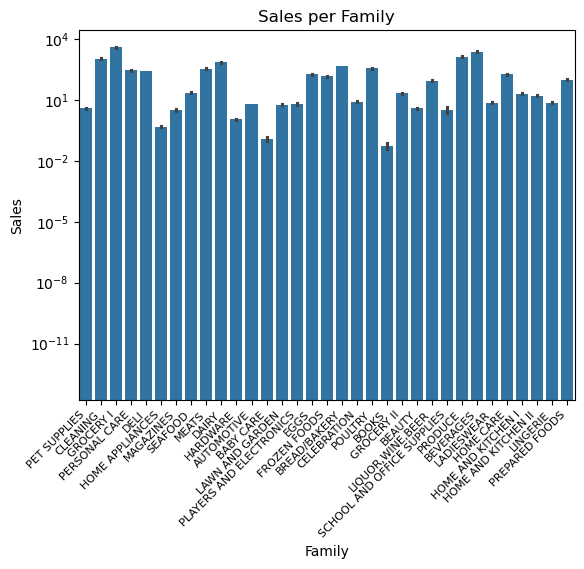

In [9]:
sns.barplot(data=muestra,x="family",y="sales",)
plt.xticks(rotation=45,ha="right",fontsize=8)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.yscale("log")
plt.xlabel('Family')
plt.ylabel('Sales')
plt.title('Sales per Family')

有效利用其他数据集

In [10]:
#oil
oil["date"]=pd.to_datetime(oil["date"])
oil['year'] = oil['date'].dt.year
oil['month'] = oil['date'].dt.month
oil['day'] = oil['date'].dt.day
oil['dayofweek'] = oil['date'].dt.dayofweek

oil.isna().sum(), oil.shape

(date           0
 dcoilwtico    43
 year           0
 month          0
 day            0
 dayofweek      0
 dtype: int64,
 (1218, 6))

In [11]:
# mean_values = oil.mean()
# oil = oil.fillna(mean_values)

# oil.isna().sum()

oil = oil.fillna(method='ffill')
oil = oil.dropna()
oil.isna().sum(), oil.shape


(date          0
 dcoilwtico    0
 year          0
 month         0
 day           0
 dayofweek     0
 dtype: int64,
 (1217, 6))

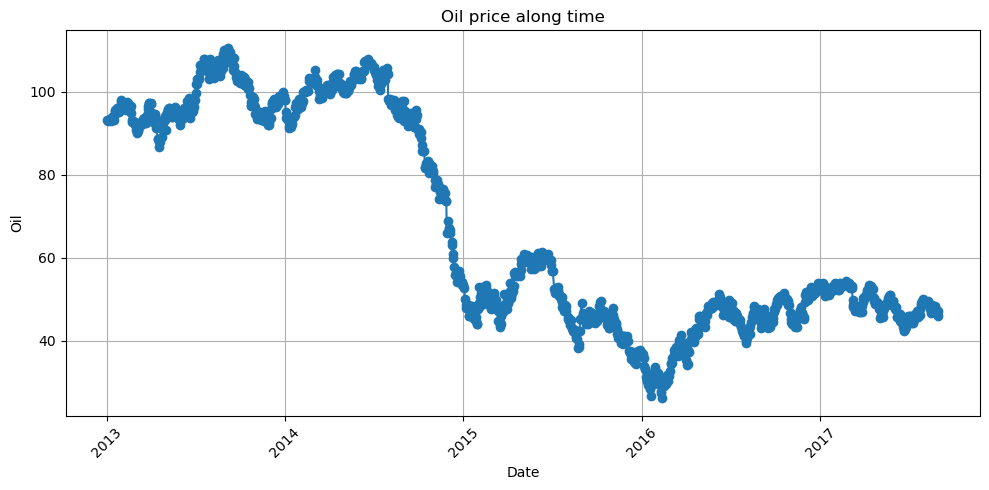

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(oil['date'], oil['dcoilwtico'], marker='o')
plt.xlabel('Date')  
plt.ylabel('Oil')  
plt.title('Oil price along time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
union=muestra.merge(oil,on=["year","month","day"],how="left")
union=union.drop(axis=1,columns=["dayofweek_x","date_y","dayofweek_y"])
union['dcoilwtico'] = union['dcoilwtico'].fillna(method='bfill')
union.head()

,id,date_x,store_nbr,family,sales,onpromotion,year,month,day,dcoilwtico
0,1987418,2016-01-24,22,PET SUPPLIES,1.0,0,2016,1,24,45.75
1,1680947,2015-08-04,23,PET SUPPLIES,1.0,0,2015,8,4,45.75
2,722344,2014-02-11,27,CLEANING,481.0,0,2014,2,11,99.96
3,1542564,2015-05-18,40,GROCERY I,4924.0,9,2015,5,18,59.44
4,2276167,2016-07-04,24,PERSONAL CARE,284.0,1,2016,7,4,49.02


In [14]:
# #transactions
# transactions["date"]=pd.to_datetime(transactions["date"])
# transactions['year'] = transactions['date'].dt.year
# transactions['month'] = transactions['date'].dt.month
# transactions['day'] =transactions['date'].dt.day
# transactions['dayofweek'] = transactions['date'].dt.dayofweek

# transactions.isna().sum(), transactions.shape

In [15]:
# union=union.merge(transactions,on=["year","month","day","store_nbr"],how="left")
# union=union.drop(axis=1,columns=["date","dayofweek"])
# union.head()

In [16]:
union=pd.get_dummies(data=union,columns=["family"],drop_first=True)
union=union.dropna()

# Select columns to normalize
columns_to_normalize = ['dcoilwtico']

# Min-Max Normalization
scaler = MinMaxScaler()
union[columns_to_normalize] = scaler.fit_transform(union[columns_to_normalize])

union.head()

,id,date_x,store_nbr,sales,onpromotion,year,month,day,dcoilwtico,family_BABY CARE,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,1987418,2016-01-24,22,1.0,0,2016,1,24,0.231671,False,...,False,False,False,True,False,False,False,False,False,False
1,1680947,2015-08-04,23,1.0,0,2015,8,4,0.231671,False,...,False,False,False,True,False,False,False,False,False,False
2,722344,2014-02-11,27,481.0,0,2014,2,11,0.873742,False,...,False,False,False,False,False,False,False,False,False,False
3,1542564,2015-05-18,40,4924.0,9,2015,5,18,0.393817,False,...,False,False,False,False,False,False,False,False,False,False
4,2276167,2016-07-04,24,284.0,1,2016,7,4,0.270402,False,...,False,False,True,False,False,False,False,False,False,False


In [17]:
x=union.drop(axis=1,columns=["id","date_x","sales"])
y=union["sales"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [18]:
from joblib import Parallel, delayed

# 定义分类器字典
classifiers = {
    "RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SGDRegressor": SGDRegressor(),
    "MLPRegressor": MLPRegressor()
}

# 初始化结果字典
Results = {
    "Classifier": [],
    "r2 Score": []
}

# 使用joblib进行并行化
def evaluate_classifier(classifier_name, classifier):
    classifier.fit(xtrain, ytrain)
    prediction = classifier.predict(xtest)
    r2 = r2_score(ytest, prediction)
    return classifier_name, r2

# 并行执行每个分类器的训练和预测
results = Parallel(n_jobs=-1)(delayed(evaluate_classifier)(name, clf) for name, clf in classifiers.items())

# 将结果添加到字典中
for classifier_name, r2 in results:
    Results["Classifier"].append(classifier_name)
    Results["r2 Score"].append(r2)

# 将结果转换为DataFrame
results_df = pd.DataFrame(Results)

# 打印结果
print(results_df)


              Classifier      r2 Score
0  RandomForestRegressor  8.414220e-01
1      AdaBoostRegressor  4.102421e-01
2           SGDRegressor -2.018746e+22
3           MLPRegressor  5.619294e-01


In [19]:
# 定义超参数网格
params = {
    "n_estimators": [200, 225, 250, 275],
    "max_depth": [None, 3, 4, 5],
    "min_samples_split": [2, 3],  # min_samples_split不能是None或1, 否则会报错
    "min_samples_leaf": [1, 2, 3]  # 同样，min_samples_leaf不能是None或1
}

# 创建随机森林回归器
forest = RandomForestRegressor()

# 使用GridSearchCV进行超参数搜索
Search = GridSearchCV(estimator=forest, param_grid=params, scoring="r2", n_jobs=-1, cv=5)  # n_jobs=-1使用所有核心，cv=5是默认的交叉验证折数

# 训练模型
Search.fit(xtrain, ytrain)

# 输出最优参数和最佳R2分数
print("Best Parameters found:")
print(Search.best_params_)
print("Best R2 Score:")
print(Search.best_score_)

# 用最佳模型进行预测
y_pred = Search.best_estimator_.predict(xtest)
Final_r2 = r2_score(ytest, y_pred)
print("Final R2 =", Final_r2)

Best Parameters found:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 250}
Best R2 Score:
0.7806181652248473
Final R2 = 0.8597129172146738


In [20]:
datas["date"]=pd.to_datetime(datas["date"])
datas['year'] = datas['date'].dt.year
datas['month'] = datas['date'].dt.month
datas['day'] = datas['date'].dt.day
datas['dayofweek'] = datas['date'].dt.dayofweek
union_final=datas.merge(oil,on=["year","month","day"],how="left")
union_final=union_final.drop(axis=1,columns=["dayofweek_x","date_y","dayofweek_y"])
# union_final=union_final.merge(transactions,on=["year","month","day","store_nbr"],how="left")
# union_final=union_final.drop(axis=1,columns=["date","dayofweek"])
union_final=pd.get_dummies(data=union_final,columns=["family"],drop_first=True)
union_final=union_final.dropna()
union_final[columns_to_normalize] = scaler.fit_transform(union_final[columns_to_normalize])
x_final=union_final.drop(axis=1,columns=["id","date_x","sales"])
y_final=union_final["sales"]
print(x_final.shape)
print(y_final.shape)
xtrain_final,xtest_final,ytrain_final,ytest_final=train_test_split(x_final,y_final,test_size=0.2)

(2141964, 38)
(2141964,)


In [23]:
# 定义最终的随机森林回归器并设置n_jobs=-1以使用所有CPU核心
final_forest = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=250,
    n_jobs=-1  # 使用所有可用的CPU核心
)

# 训练模型
final_forest.fit(xtrain_final, ytrain_final)

# 进行预测
prediction = final_forest.predict(xtest_final)

# 计算最终的R2分数
Final_r2_score = r2_score(ytest_final, prediction)
print("Final R2 score =", Final_r2_score)

Final R2 score = 0.9092454821987545


In [24]:
test["date"]=pd.to_datetime(test["date"])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek
test.head()

,id,date,store_nbr,family,onpromotion,year,month,day,dayofweek
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2


In [29]:
test_union=test.merge(oil,on=["year","month","day"],how="left")
test_union=test_union.drop(axis=1,columns=["dayofweek_x","date_y","dayofweek_y"])
# test_union=test_union.merge(transactions,on=["year","month","day","store_nbr"],how="left")
# test_union=test_union.drop(axis=1,columns=["date","dayofweek"])
test_union=pd.get_dummies(data=test_union,columns=["family"],drop_first=True)
test_union[columns_to_normalize] = scaler.transform(test_union[columns_to_normalize])
test_union = test_union.fillna(method='ffill')

test_union.head()

,id,date_x,store_nbr,onpromotion,year,month,day,dcoilwtico,family_BABY CARE,family_BEAUTY,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,3000888,2017-08-16,1,0,2017,8,16,0.244108,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3000889,2017-08-16,1,0,2017,8,16,0.244108,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3000890,2017-08-16,1,2,2017,8,16,0.244108,False,True,...,False,False,False,False,False,False,False,False,False,False
3,3000891,2017-08-16,1,20,2017,8,16,0.244108,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3000892,2017-08-16,1,0,2017,8,16,0.244108,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
x_test=test_union.drop(axis=1,columns=["id","date_x"])
Final_predictions=final_forest.predict(x_test)
output = pd.DataFrame({'id': test_union['id'], 'sales': Final_predictions})
output.to_csv('suhan_pre.csv', index=False)

print("'suhan_pre.csv'")

'suhan_pre.csv'
